In [1]:
from mnist import load_mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [3]:
train[0].shape, train[1].shape

((55000, 28, 28, 1), (55000,))

In [4]:
train[1]

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

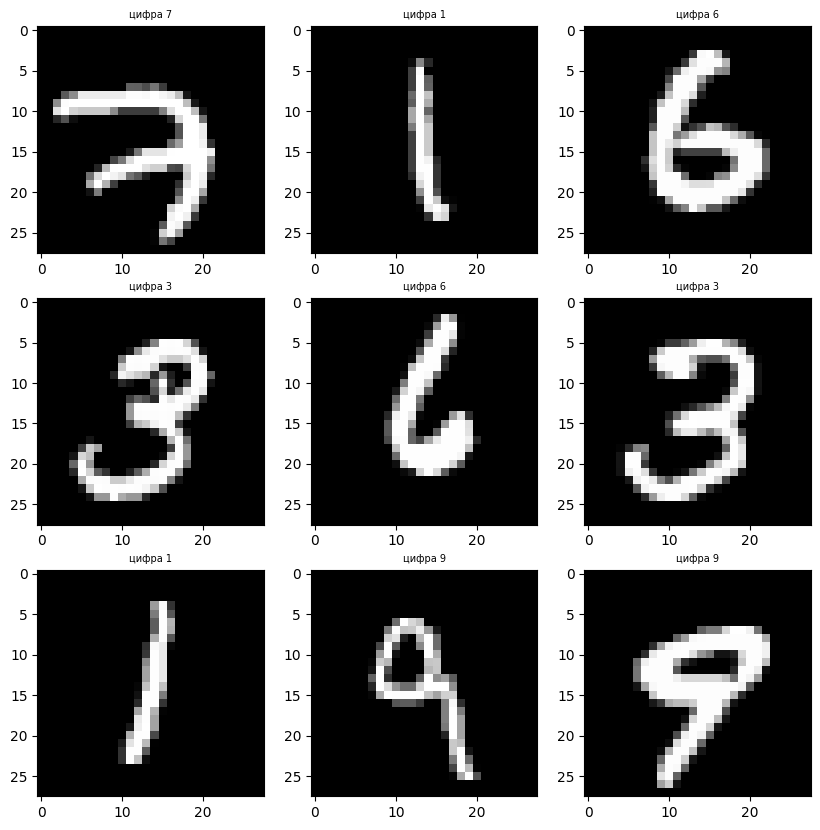

In [5]:
fig, axis = plt.subplots(3, 3, figsize = (10,10))
for i in range(3):
    for j in range(3):
        axis[i, j].imshow(train[0][i**2 + 20 * j], cmap = 'gray')
        axis[i, j].set_title('цифра ' + str(train[1][i**2 + 20 * j]), fontdict = {'fontsize':7})


In [6]:
class my_PCA(): 
    def __init__(self, n_components=None): 
        self.n_components = n_components
     
    def fit(self, X): 
        Y = X.astype('float64')
        Y_mean = np.mean(Y, axis = 0)
        Y -= Y_mean 
        #Y /= Y.std(axis = 0)
        C = Y.T.dot(Y)
        w, v = np.linalg.eigh(C)
        w = w[::-1]
        v = v[:, ::-1]
        return Y, v, w
     
    def transform(self, X, v): 
        Y = X.dot(v)
        return Y
     
    def fit_transform(self, X):
        X_c, v, w = self.fit(X)
        Y = self.transform(X_c, v)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

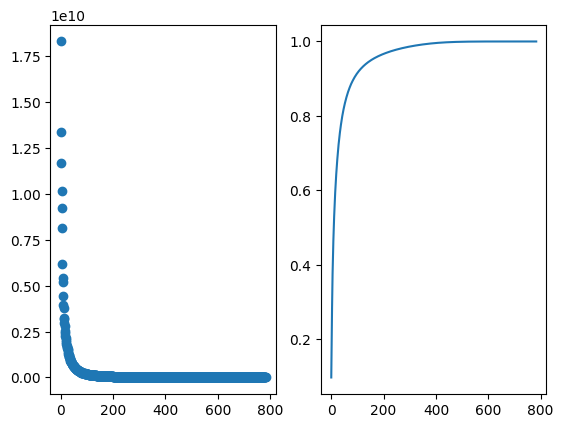

In [7]:
start = my_PCA(2)
Y, v, w = start.fit(train[0].reshape(-1,784))
plt.subplot(1,2,1)
plt.plot(w, marker = 'o', linestyle = '')
plt.subplot(1,2,2)
plt.plot(np.cumsum(w) / np.sum(w))

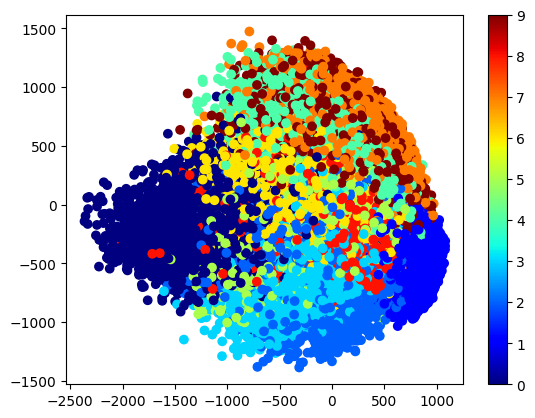

In [8]:
Y = start.fit_transform(train[0].reshape(-1,784))
plt.scatter(Y[:, 0], Y[:, 1], c = train[1], cmap='jet')
plt.colorbar()

In [9]:
class kNN():
    
    def __init__(self, n_neighbours = 5):
        self.n_neighbours = n_neighbours
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        predict_class = list()
        for item in X: 
            point_dist = list() 
            for j in range(len(self.X_train)): #считаем расстояние от точки до каждого элемента
                dist = np.sqrt(np.sum((np.array(self.X_train[j]) - np.array(item)) ** 2)) 
                point_dist.append(dist)
            point_dist = np.array(point_dist)
            #вычисляем индексы первых k минимальных расстояний
            min_dist_arg = np.argsort(point_dist)[:self.n_neighbours] 
            min_dist_labels = list()
            for i in min_dist_arg: #находим соответсвующие лэйблы к этим соседям
                min_dist_labels.append(self.y_train[i]) #вычисляем уникальные метки и их число
            values, counts = np.unique(min_dist_labels, return_counts = True) #ищем метку с максимальных числом вхождений
            possible_label = values[np.argmax(counts)]
            predict_class.append(possible_label)
        return predict_class

In [10]:
#Без изменения через PCA

X_train, X_test, y_train, y_test = train_test_split(train[0].reshape(-1,784), train[1], test_size = 1500, random_state=42)
test_k_1 = kNN(1)
test_k_1.fit(X_train, y_train)
y_out_k_1 = test_k_1.predict(X_test)
print("Точность при k = 1:", accuracy_score(y_test, y_out_k_1) * 100)
test_k_5 = kNN(5)
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_10 = kNN(10)
test_k_10.fit(X_train, y_train)
y_out_k_10 = test_k_10.predict(X_test)
print("Точность при k = 10:", accuracy_score(y_test, y_out_k_10) * 100)
test_k_20 = kNN(120)
test_k_20.fit(X_train, y_train)
y_out_k_20 = test_k_20.predict(X_test)
print("Точность при k = 20:", accuracy_score(y_test, y_out_k_20) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

KeyboardInterrupt: 